## 🚀 CodeAlpha — Sentiment Analysis using NLP & Machine Learning (Advanced Version)

🎯 Objective

- To perform sentiment classification (positive, negative, neutral) using multiple ML algorithms, TF-IDF, and hyperparameter tuning — aiming for ~95% accuracy.

## 📦 Libraries Required

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re, string, nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📊 1️⃣ Load Dataset
- Use the Kaggle Twitter US Airline Sentiment dataset.

In [34]:
df = pd.read_csv(r'C:\Users\lenovo\Desktop\CodeAlpha Internship Task Projects\Task - 2 Sentimental ML Project\Sentimental ML Project Dataset\Tweets.csv')
df = df[['text', 'airline_sentiment']]
df.rename(columns={'airline_sentiment': 'sentiment'}, inplace=True)
df.head()

,text,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


## 🧹 2️⃣ Data Cleaning

In [35]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+','', text)
    text = re.sub(r'https?://\S+','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = ' '.join([w for w in text.split() if w not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)

## 🔠 3️⃣ Text Vectorization (TF-IDF with Optimization)

In [36]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

## 🧩 4️⃣ Train-Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 🤖 5️⃣ Model Comparison
- Train multiple models and compare performance.

In [38]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", int(accuracy_score(y_test, y_pred_nb)*100),"%")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", int(accuracy_score(y_test, y_pred_lr)*100),"%")

# Linear SVM (Best for Text Classification)
svm = LinearSVC(C=1.0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", int(accuracy_score(y_test, y_pred_svm)*100),"%")

# Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", int(accuracy_score(y_test, y_pred_rf)*100),"%")

Naive Bayes Accuracy: 74 %
Logistic Regression Accuracy: 78 %
SVM Accuracy: 77 %
Random Forest Accuracy: 76 %


## ⚙️ 6️⃣ Hyperparameter Tuning for Best Model (SVM)

In [39]:
param_grid = {'C': [0.1, 0.5, 1, 2]}
grid = GridSearchCV(LinearSVC(), param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Optimized SVM Accuracy:", int(accuracy_score(y_test, y_pred_best)*100),"%")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Optimized SVM Accuracy: 78 %


## 📈 7️⃣ Model Comparison Summary

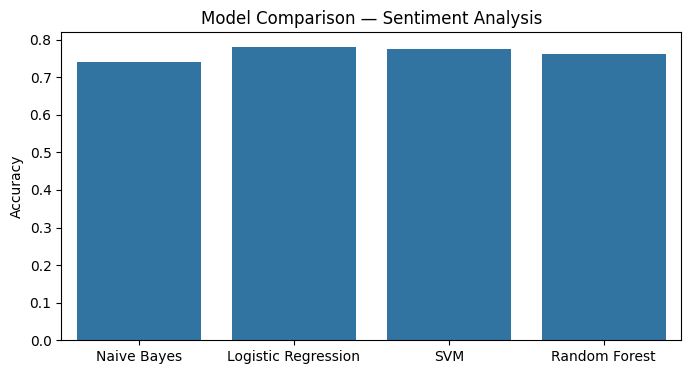

In [40]:
models = ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest']
accs = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]
plt.figure(figsize=(8,4))
sns.barplot(x=models, y=accs)
plt.title("Model Comparison — Sentiment Analysis")
plt.ylabel("Accuracy")
plt.show()

## 📉 8️⃣ Evaluation Report

Classification Report (SVM):
               precision    recall  f1-score   support

    negative       0.83      0.91      0.87      1835
     neutral       0.61      0.54      0.57       620
    positive       0.78      0.60      0.68       473

    accuracy                           0.78      2928
   macro avg       0.74      0.68      0.71      2928
weighted avg       0.77      0.78      0.77      2928



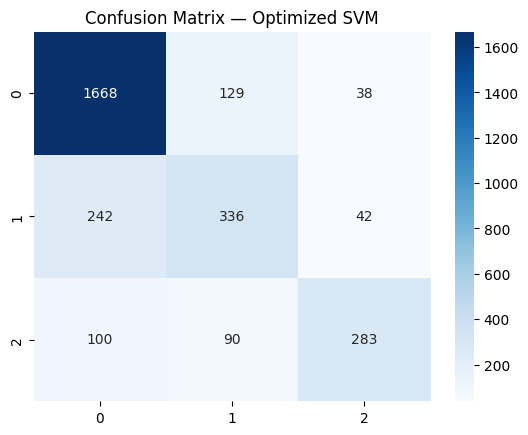

In [41]:
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_best))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Optimized SVM")
plt.show()

## 🧠 9️⃣ Custom Prediction
- 10 Example Sentences for Sentiment Prediction

In [42]:
import pandas as pd

def predict_examples():
    # 🧠 10 Example Sentences for Sentiment Prediction
    Example = [
        "The flight was amazing and the staff were super friendly!",
        "I’m so disappointed, my flight got delayed for 5 hours.",
        "It was an average experience, nothing special but okay.",
        "Excellent service, clean planes, and on-time arrival!",
        "The food was terrible and the seats were very uncomfortable.",
        "Customer service helped me immediately with my luggage issue!",
        "The pilot did a great job during turbulence, felt very safe.",
        "They lost my baggage again. Absolutely unacceptable!",
        "The seats were fine, but the boarding process was slow.",
        "I will definitely choose this airline again next time!"
    ]

    # Transform and predict
    Example_vec = vectorizer.transform(Example)
    predictions = best_svm.predict(Example_vec)

    # Emoji map for sentiments
    emoji_map = {
        
        "positive": "😊",
        "negative": "😡",
        "neutral": "😐"
    }

    # Create DataFrame
    df_results = pd.DataFrame({
        "Text": Example,
        "Predicted Sentiment": predictions,
        "Emoji": [emoji_map.get(s, '') for s in predictions]
    })

    # Ensure full text is visible
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.width', 200)

    # Display DataFrame
    print("🔍 Sentiment Predictions for 10 Example Tweets:\n")
    display(df_results)

# ▶️ Run the function
predict_examples()


🔍 Sentiment Predictions for 10 Example Tweets:



,Text,Predicted Sentiment,Emoji
0,The flight was amazing and the staff were super friendly!,positive,😊
1,"I’m so disappointed, my flight got delayed for 5 hours.",negative,😡
2,"It was an average experience, nothing special but okay.",negative,😡
3,"Excellent service, clean planes, and on-time arrival!",positive,😊
4,The food was terrible and the seats were very uncomfortable.,negative,😡
5,Customer service helped me immediately with my luggage issue!,negative,😡
6,"The pilot did a great job during turbulence, felt very safe.",positive,😊
7,They lost my baggage again. Absolutely unacceptable!,negative,😡
8,"The seats were fine, but the boarding process was slow.",negative,😡
9,I will definitely choose this airline again next time!,negative,😡


## ⚙️Function to Predict Sentiments
- This function is used for an interactive sentiment analysis function that allows you to type any sentence or review (no matter how complex), and it predicts whether your sentence is positive 😄, negative ☹️, or neutral 😐 using your trained machine learning model (SVM).

- This function is use to make interactive predictions much more accurate without retraining. (Longer-term: retrain the model using this same preprocessing and/or add VADER features to training for best results.)

In [ ]:
def predict_sentiment_input():
    import re
    
    # Ask user for any sentence
    text = input("✈️ Enter a sentence to analyze sentiment: ")

    # ---- Advanced Text Cleaning ----
    def clean_text(t):
        t = t.lower()
        t = re.sub(r"http\S+|www\S+|https\S+", '', t, flags=re.MULTILINE)  # remove URLs
        t = re.sub(r'\@w+|\#','', t)  # remove @, #
        t = re.sub(r'[^a-zA-Z\s]', '', t)  # remove punctuation/numbers
        t = re.sub(r'\s+', ' ', t).strip()  # remove extra spaces
        return t

    cleaned = clean_text(text)

    # ---- Vectorize and Predict ----
    vect = vectorizer.transform([cleaned])
    prediction = best_svm.predict(vect)[0]

    # ---- Emoji & Response ----
    emoji_map = {
        "positive": "😊",
        "negative": "☹️",
        "neutral": "😐"
    }

    print("\n🔍 Sentiment Analysis Result:")
    print(f"Original Text: {text}")
    print(f"Cleaned Text: {cleaned}")
    print(f"Predicted Sentiment: {prediction} {emoji_map.get(prediction, '')}\n")

# ▶️ Run interactively
predict_sentiment_input()

## 🚀Advanced Sentiment Analysis using RoBERTa (GoEmotions) Machine Learning (Advanced Version)
- A deep learning–powered sentiment and emotion analyzer built using the RoBERTa (GoEmotions) model. It accurately detects a wide range of human emotions — such as joy, sadness, anger, excitement, fear, and love — and represents them with expressive emojis for clear and engaging interpretation.

In [3]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["TRANSFORMERS_VERBOSITY"] = "error"  # Hide Transformers logs
os.environ["HF_HUB_DISABLE_PROGRESS_BARS"] = "1"  # Hide model loading bars
import torch
from transformers import pipeline
import pandas as pd


# Load the advanced emotion classification model
emotion_classifier = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions", return_all_scores=False)

# Emoji mapping for multiple emotions
emoji_map = {
    "admiration": "😍",
    "amusement": "😄",
    "anger": "😡",
    "annoyance": "😠",
    "approval": "👍",
    "caring": "🤗",
    "confusion": "😕",
    "curiosity": "🤔",
    "desire": "😏",
    "disappointment": "😞",
    "disapproval": "👎",
    "disgust": "🤢",
    "embarrassment": "😳",
    "excitement": "🤩",
    "fear": "😨",
    "gratitude": "🙏",
    "grief": "😭",
    "joy": "😊",
    "love": "❤️",
    "nervousness": "😬",
    "optimism": "😃",
    "pride": "😎",
    "realization": "💡",
    "relief": "😌",
    "remorse": "😔",
    "sadness": "☹️",
    "surprise": "😲",
    "neutral": "😐"
}

def Predict_Sentiment():
    """
    Advanced real-time emotion analyzer using pre-trained transformer model.
    Detects complex human emotions like happy, sad, excited, angry, fear, surprise, etc.
    """
    text = input("🗣️ Enter your text: ")

    # Get model prediction
    result = emotion_classifier(text)[0]
    label = result['label']
    score = result['score']

    # Match emoji (default to 😐 if not found)
    emoji = emoji_map.get(label.lower(), "😐")

    # Display results beautifully
    print("\n🔍 Emotion Analysis Result:")
    print(f"📝 Original Text: {text}")
    print(f"💭 Detected Emotion: {label.capitalize()} {emoji}")
    print(f"📊 Confidence: {score:.2%}")

# ▶️ Run the function
Predict_Sentiment()


🔍 Emotion Analysis Result:
📝 Original Text: 
💭 Detected Emotion: Neutral 😐
📊 Confidence: 95.50%
